# Linear Regression 

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

In [5]:
customers = pd.read_csv('Ecommerce Customers.txt')

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [11]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Exploratory Data Analysis (EDA)

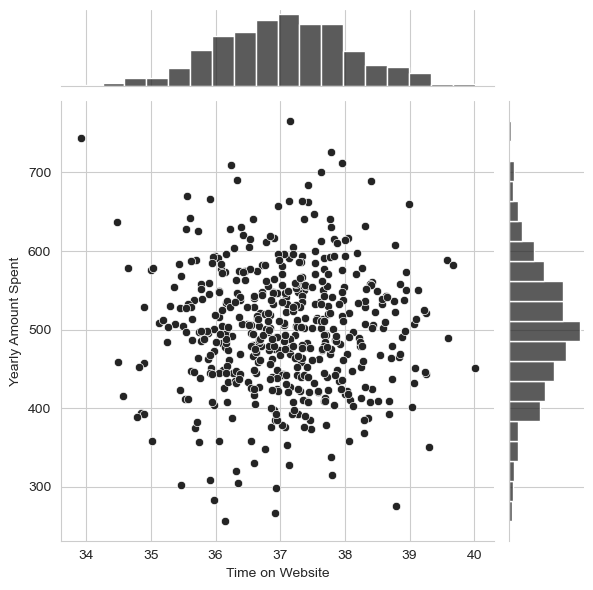

In [19]:
sns.set_palette('gray')
sns.set_style('whitegrid')
sns.jointplot( x='Time on Website', y='Yearly Amount Spent', data=customers)

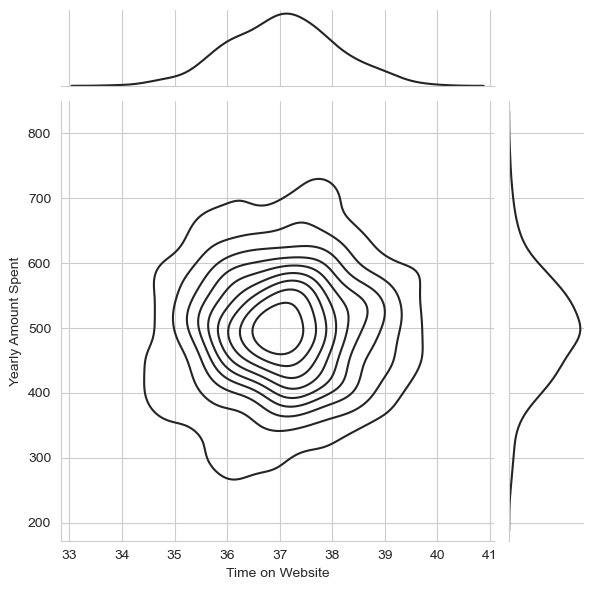

In [21]:
sns.jointplot( x='Time on Website', y='Yearly Amount Spent', data=customers,kind='kde')

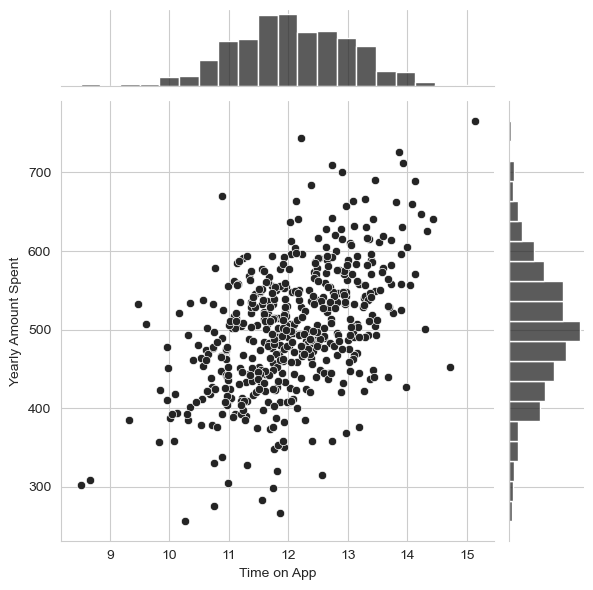

In [24]:
sns.jointplot( x='Time on App', y='Yearly Amount Spent', data=customers)

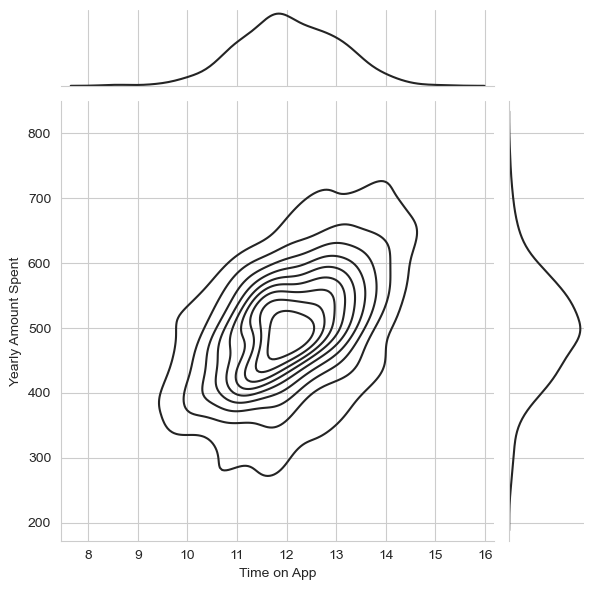

In [26]:
sns.jointplot( x='Time on App', y='Yearly Amount Spent', data=customers,kind='kde')

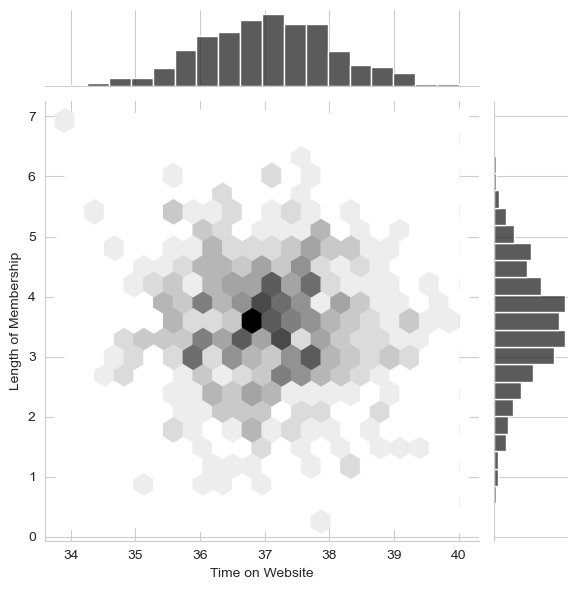

In [29]:
sns.jointplot( x='Time on Website', y='Length of Membership', data=customers,kind='hex')

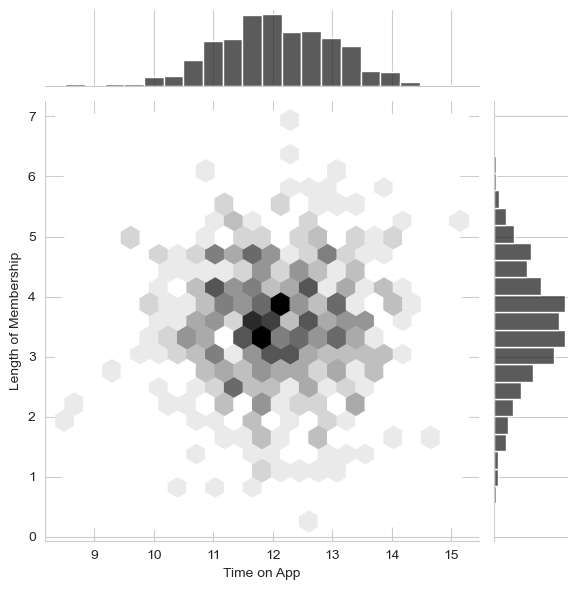

In [32]:
sns.jointplot( x='Time on App', y='Length of Membership', data=customers,kind='hex')

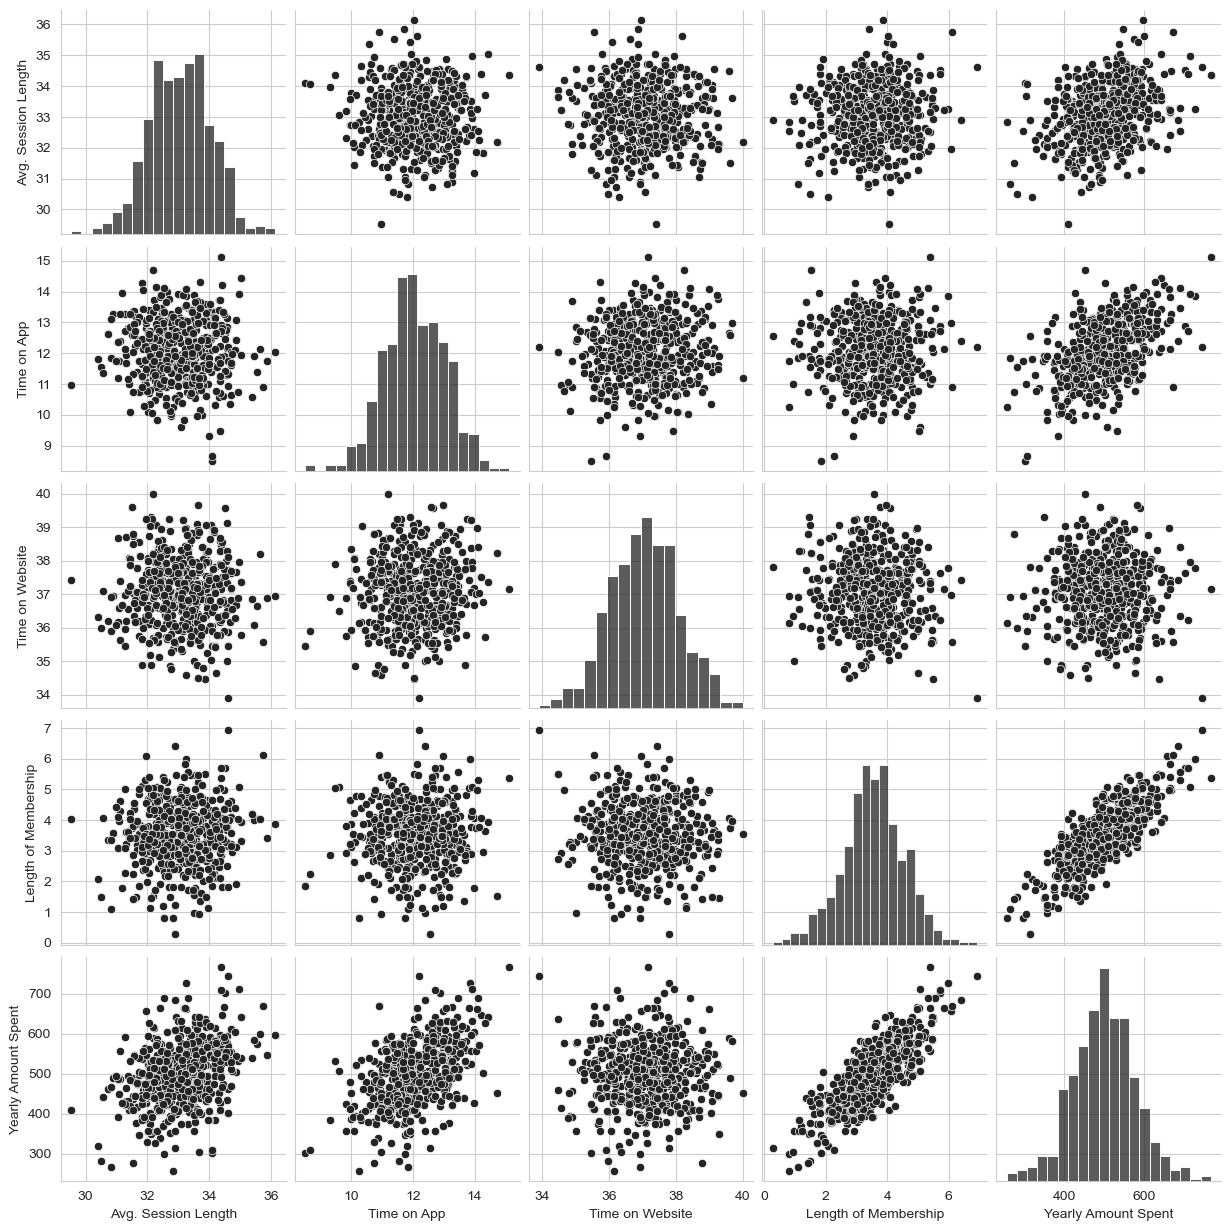

In [35]:
sns.pairplot(customers)

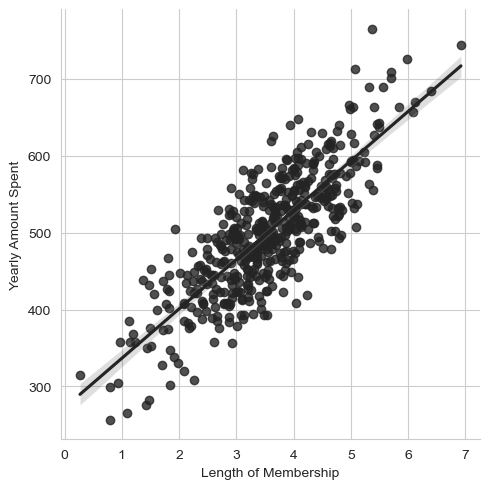

In [40]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

# Training and Testing Data

In [43]:
x = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = customers['Yearly Amount Spent']

In [46]:
from sklearn.model_selection import  train_test_split 

In [48]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=101)

# Training the Model

In [62]:
from sklearn.linear_model import LinearRegression

In [64]:
lm = LinearRegression()

In [66]:
lm.fit(x_train,y_train)

LinearRegression()

# Predicting Test Data

In [68]:
prediction = lm.predict(x_test)

# Evaluating the Model

Text(0, 0.5, 'Y predictions')

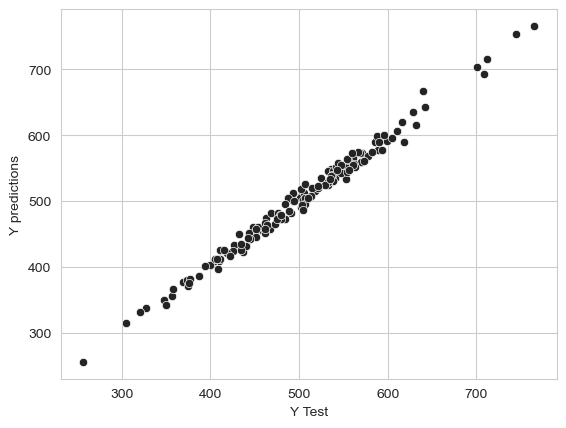

In [70]:
sns.scatterplot(x=y_test,y=prediction)
plt.xlabel('Y Test')
plt.ylabel('Y predictions')

In [72]:
customers['Yearly Amount Spent'].mean()

499.31403825859053

In [74]:
from sklearn import metrics

In [76]:
print('MAE : ' , metrics.mean_absolute_error(y_test,prediction))
print('MSE : ' , metrics.mean_squared_error(y_test,prediction))
print('RMSE : ' , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  7.2281486534308295
MSE :  79.8130516509744
RMSE :  8.933815066978632


# Residuals

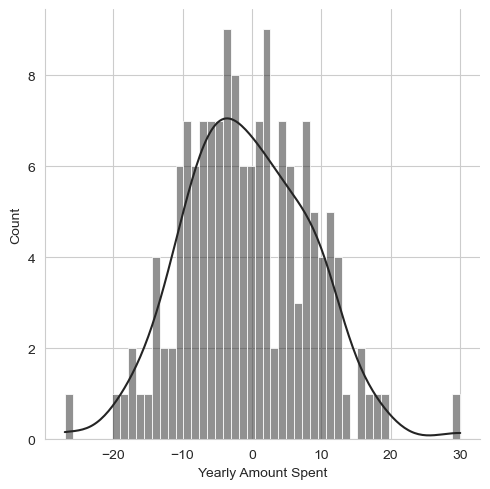

In [78]:
sns.displot((y_test-prediction),kde='True',bins=50)

# Conclusion

In [80]:
coeff_dt = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_dt

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
